### Dataset - Penguins

In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings
import seaborn as sns # type: ignore
import math

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [4]:
df.shape

(344, 10)

In [5]:
df.describe()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,342.000000
mean,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,2008.035088
std,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,0.816938
min,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,2007.000000
25%,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,2008.000000
75%,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,2009.000000
max,7197.000000,14.000000,124.300000,127.260000,231.000000,6300.000000,2009.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 333 non-null    object 
 1   island                  334 non-null    object 
 2   calorie requirement     344 non-null    int64  
 3   average sleep duration  344 non-null    int64  
 4   bill_length_mm          337 non-null    float64
 5   bill_depth_mm           333 non-null    float64
 6   flipper_length_mm       336 non-null    float64
 7   body_mass_g             339 non-null    float64
 8   gender                  327 non-null    object 
 9   year                    342 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.0+ KB


In [7]:
categorical = df.select_dtypes(include=['object']).columns


In [8]:
numerical = df.select_dtypes(include=['int64','float64']).columns


In [9]:
print(f"Categorical columns: {categorical}")
print(f"Numerical columns: {numerical}")

Categorical columns: Index(['species', 'island', 'gender'], dtype='object')
Numerical columns: Index(['calorie requirement', 'average sleep duration', 'bill_length_mm',
       'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')


In [10]:
df.isnull().sum()

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64

### Droping
Since the null values are in less numbers, we will not execute this.

In [11]:
print("Unique values in each column ",df.nunique())

Unique values in each column  species                     8
island                      8
calorie requirement       333
average sleep duration      8
bill_length_mm            172
bill_depth_mm              83
flipper_length_mm          60
body_mass_g                97
gender                      4
year                        3
dtype: int64


In [12]:
for i in df.select_dtypes(include=['object']).columns:
        mode_value = df[i].mode()[0]
        df[i].fillna(mode_value,inplace=True)

for i in df.select_dtypes(include=['int64','float64']).columns:
        mean = df[i].mean()
        df[i].fillna(math.ceil(mean),inplace=True)


In [13]:
df.isnull().sum()

species                   0
island                    0
calorie requirement       0
average sleep duration    0
bill_length_mm            0
bill_depth_mm             0
flipper_length_mm         0
body_mass_g               0
gender                    0
year                      0
dtype: int64

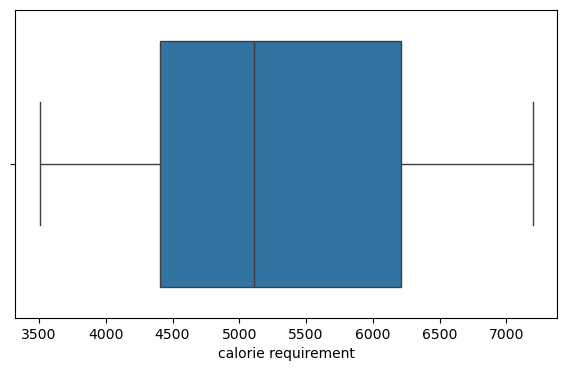

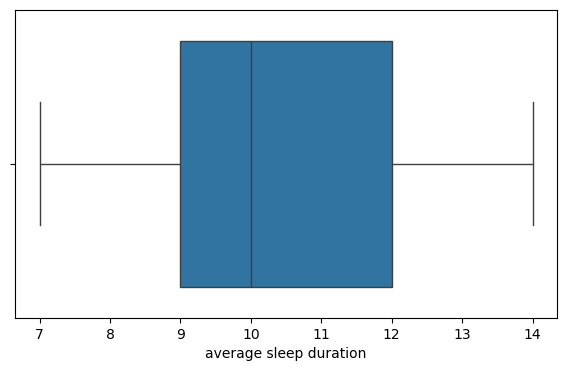

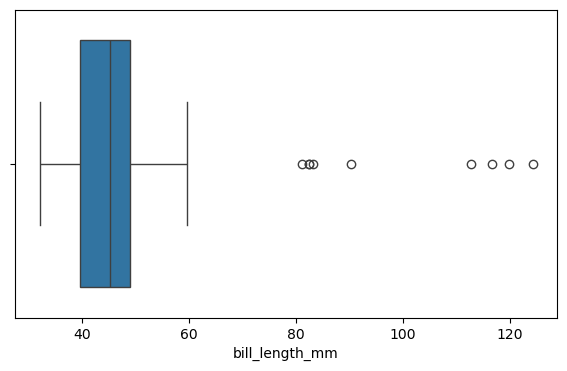

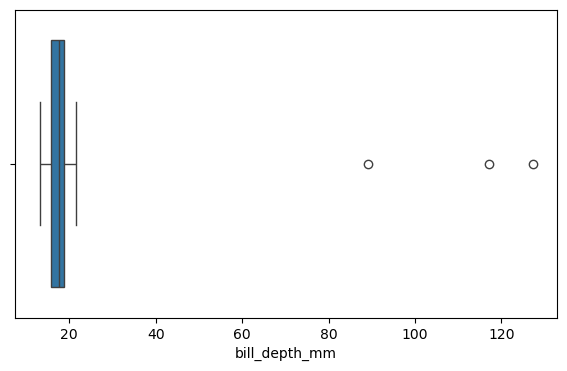

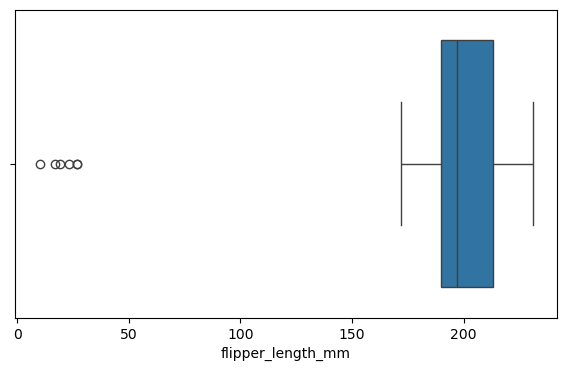

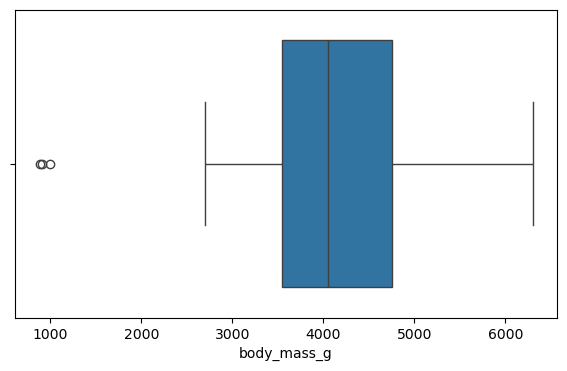

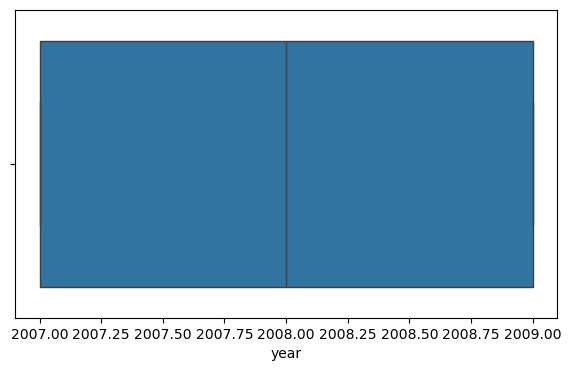

In [14]:
for c in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[c])
    plt.show()

In [15]:
df_zscore = df.copy()
for i in df.select_dtypes(include=['int64','float64']).columns:
  z_score_column = i + '_z-score'
  df_zscore[z_score_column] = (df[i] - df[i].mean()) / df[i].std()


In [16]:
df_zscore.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year,calorie requirement_z-score,average sleep duration_z-score,bill_length_mm_z-score,bill_depth_mm_z-score,flipper_length_mm_z-score,body_mass_g_z-score,year_z-score
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0,1.210718,0.243756,-0.598267,0.071511,-0.611191,-0.499126,-1.272466
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0,-0.355822,1.567736,-0.560902,-0.071447,-0.428967,-0.440471,-1.272466
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0,1.792201,0.243756,-0.486171,-0.005466,-0.100965,-1.085684,-1.272466
3,Adelie,Torgersen,4169,8,46.0,19.0,198.0,992.0,male,2007.0,-1.030941,-1.080224,0.046286,0.104501,0.008370,-3.734577,-1.272466
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0,-0.464440,-1.080224,-0.822460,0.137491,-0.173854,-0.851061,-1.272466


In [17]:
for i in df_zscore.columns[df_zscore.columns.str.endswith('_z-score')]:
    outliers = df_zscore[df_zscore[i] > 3]
    print(f"Number of outliers in {i}: {len(outliers)}")


Number of outliers in calorie requirement_z-score: 0
Number of outliers in average sleep duration_z-score: 0
Number of outliers in bill_length_mm_z-score: 9
Number of outliers in bill_depth_mm_z-score: 3
Number of outliers in flipper_length_mm_z-score: 0
Number of outliers in body_mass_g_z-score: 0
Number of outliers in year_z-score: 0


In [18]:
df.loc[df_zscore['bill_length_mm_z-score'] > 3].head(10)


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
17,adelie,Torgersen,6543,8,82.40,20.7,197.0,4500.0,male,2007.0
21,Adelie,Biscoe,4138,8,82.47,18.7,180.0,3600.0,male,2007.0
72,Adelie,torgersen,3955,12,119.89,17.2,196.0,4176.0,male,2008.0
92,Adelie,Dream,4612,12,81.10,17.1,27.0,3400.0,female,2008.0
147,Adelie,Biscoe,6356,10,124.30,18.4,184.0,3475.0,male,2009.0
210,gentoo,Biscoe,4985,11,90.30,14.5,208.0,4450.0,female,2008.0
279,CHINSTRAP,Biscoe,5337,9,116.67,18.7,198.0,3525.0,female,2007.0
322,Chinstrap,Dream,3802,9,83.27,17.9,19.0,3400.0,female,2009.0
335,chinstrap,DREAM,7195,13,112.75,19.4,194.0,3525.0,female,2009.0


In [19]:
df.loc[df_zscore['bill_depth_mm_z-score'] > 3].head(10)


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
36,Adelie,Dream,3758,7,38.8,89.21,190.0,3950.0,male,2007.0
116,Adelie,Torgersen,5580,12,46.0,117.23,188.0,2900.0,FEMALE,2009.0
161,gentoo,biscoe,4743,12,46.8,127.26,215.0,5150.0,male,2007.0


In [20]:
df_zscore = df_zscore.drop(df_zscore.loc[df_zscore['bill_length_mm_z-score'] > 3].index)
df_zscore = df_zscore.drop(df_zscore.loc[df_zscore['bill_depth_mm_z-score'] > 3].index)

In [21]:
for i in df_zscore.columns[df_zscore.columns.str.endswith('_z-score')]:
    outliers = df_zscore[df_zscore[i] > 3]
    print(f"Number of outliers in {i}: {len(outliers)}")

Number of outliers in calorie requirement_z-score: 0
Number of outliers in average sleep duration_z-score: 0
Number of outliers in bill_length_mm_z-score: 0
Number of outliers in bill_depth_mm_z-score: 0
Number of outliers in flipper_length_mm_z-score: 0
Number of outliers in body_mass_g_z-score: 0
Number of outliers in year_z-score: 0


In [22]:
df_zscore = df_zscore.drop(columns=[col for col in df_zscore.columns if col.endswith('_z-score')])

In [23]:
df_zscore.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,46.0,19.0,198.0,992.0,male,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [24]:
df_outlier_free = df_zscore.copy()

In [25]:
df_outlier_free.shape

(332, 10)

In [26]:
df_outlier_free['species']=df_outlier_free['species'].str.upper()

In [27]:
df_outlier_free['island']=df_outlier_free['island'].str.upper()

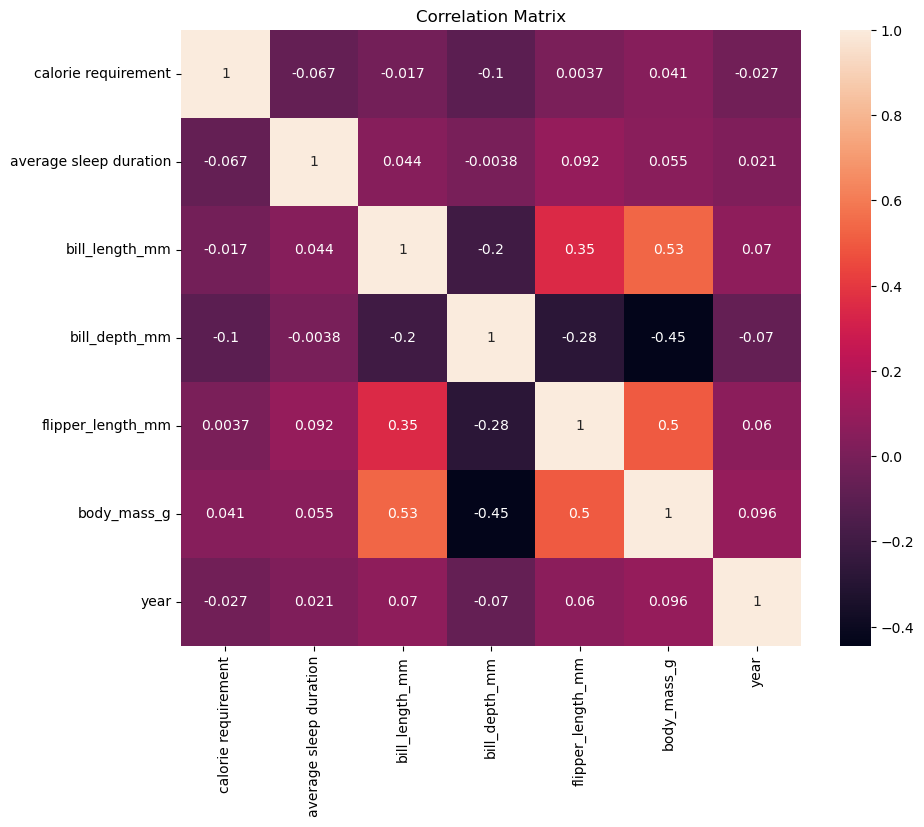

In [28]:
numeric_df = df_outlier_free.select_dtypes(include=['float64','int64'])
matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Reference : gishnuma_assignmen0_final.ipnb
df_groupby_species = df_outlier_free.groupby('species').size()

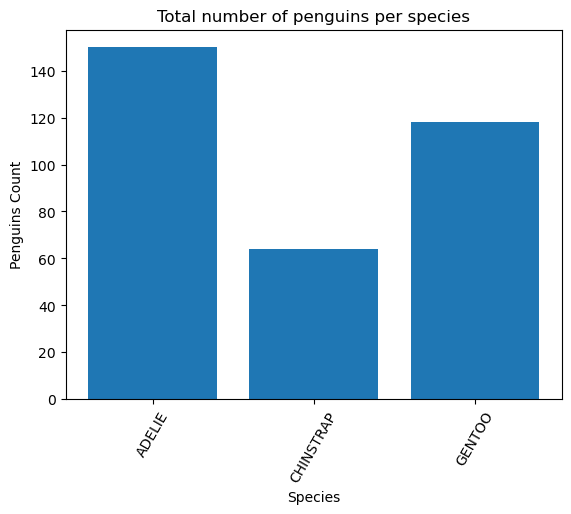

In [30]:
plt.bar(df_groupby_species.index,df_groupby_species.values)
plt.xlabel('Species')
plt.ylabel('Penguins Count')
plt.title('Total number of penguins per species')
plt.xticks(rotation=60)
plt.show()

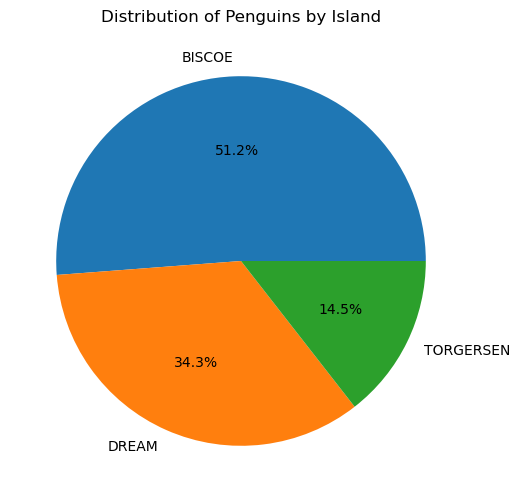

In [31]:
island_counts = df_outlier_free['island'].value_counts().sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(island_counts, labels=island_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Penguins by Island")
plt.show()

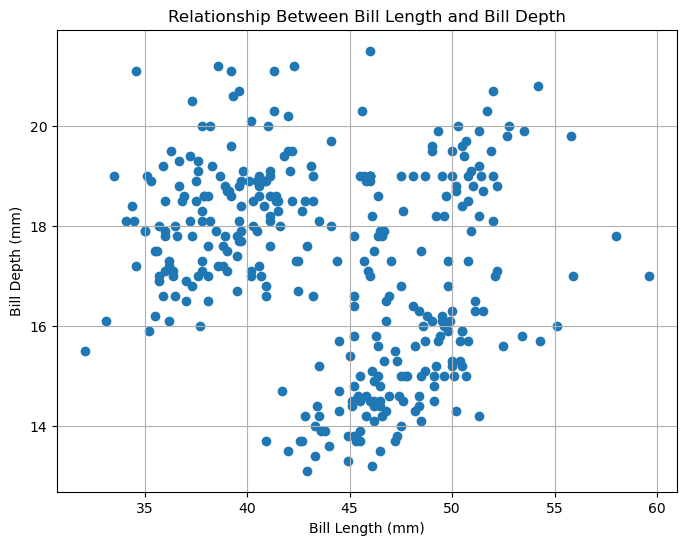

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(df_outlier_free["bill_length_mm"], df_outlier_free["bill_depth_mm"])
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("Relationship Between Bill Length and Bill Depth")
plt.grid(True)
plt.show()

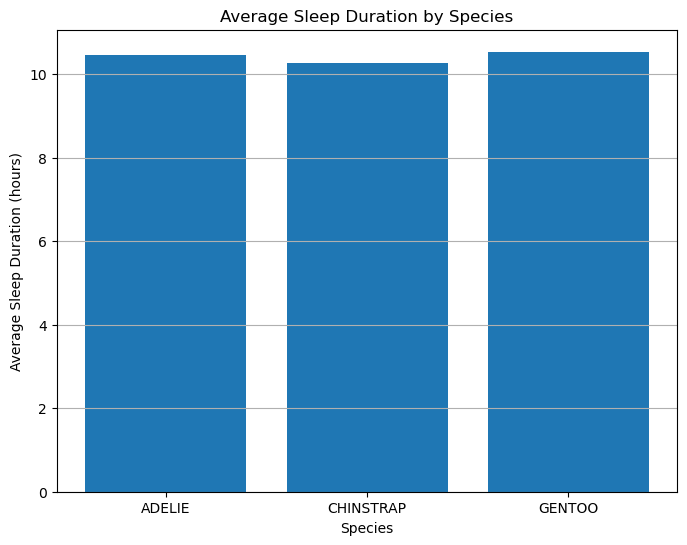

In [33]:
avg_sleep_by_species = df_outlier_free.groupby('species')['average sleep duration'].mean()

# Bar graph for average sleep duration by species
plt.figure(figsize=(8, 6))
plt.bar(avg_sleep_by_species.index, avg_sleep_by_species.values)
plt.xlabel("Species")
plt.ylabel("Average Sleep Duration (hours)")
plt.title("Average Sleep Duration by Species")
plt.grid(axis='y')
plt.show()

We will take gender as the target. therefore dropping it before we conduct encoding

In [34]:
categorical_columns=categorical.drop('gender')

In [35]:
df_encoded = pd.get_dummies(df_outlier_free, columns=categorical_columns)

In [36]:
df_encoded.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year,species_ADELIE,species_CHINSTRAP,species_GENTOO,island_BISCOE,island_DREAM,island_TORGERSEN
0,6563,11,39.1,18.7,181.0,3750.0,male,2007.0,True,False,False,False,False,True
1,4890,14,39.5,17.4,186.0,3800.0,female,2007.0,True,False,False,False,False,True
2,7184,11,40.3,18.0,195.0,3250.0,female,2007.0,True,False,False,False,False,True
3,4169,8,46.0,19.0,198.0,992.0,male,2007.0,True,False,False,False,False,True
4,4774,8,36.7,19.3,193.0,3450.0,female,2007.0,True,False,False,False,False,True


In [37]:
df_encoded.shape

(332, 14)

In [38]:
df_normalized = df_outlier_free.get(numerical)

In [39]:
df_normalized.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,6563,11,39.1,18.7,181.0,3750.0,2007.0
1,4890,14,39.5,17.4,186.0,3800.0,2007.0
2,7184,11,40.3,18.0,195.0,3250.0,2007.0
3,4169,8,46.0,19.0,198.0,992.0,2007.0
4,4774,8,36.7,19.3,193.0,3450.0,2007.0


In [40]:
min_values = df_normalized.min()
max_values = df_normalized.max()

In [41]:
normalized_df = (df_normalized - min_values) / (max_values - min_values)

In [42]:
normalized_df.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,0.828324,0.571429,0.254545,0.666667,0.773756,0.529347,0.0
1,0.375305,1.000000,0.269091,0.511905,0.796380,0.538575,0.0
2,0.996480,0.571429,0.298182,0.583333,0.837104,0.437062,0.0
3,0.180070,0.142857,0.505455,0.702381,0.850679,0.020303,0.0
4,0.343894,0.142857,0.167273,0.738095,0.828054,0.473976,0.0


In [43]:
pre_processed_df = pd.concat([normalized_df,df_encoded.iloc[:,8:],df_encoded['gender']], axis=1)

In [44]:
pre_processed_df.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_ADELIE,species_CHINSTRAP,species_GENTOO,island_BISCOE,island_DREAM,island_TORGERSEN,gender
0,0.828324,0.571429,0.254545,0.666667,0.773756,0.529347,0.0,True,False,False,False,False,True,male
1,0.375305,1.000000,0.269091,0.511905,0.796380,0.538575,0.0,True,False,False,False,False,True,female
2,0.996480,0.571429,0.298182,0.583333,0.837104,0.437062,0.0,True,False,False,False,False,True,female
3,0.180070,0.142857,0.505455,0.702381,0.850679,0.020303,0.0,True,False,False,False,False,True,male
4,0.343894,0.142857,0.167273,0.738095,0.828054,0.473976,0.0,True,False,False,False,False,True,female


In [45]:
pre_processed_df.to_csv('penguins_preprocessed.csv', index=False)

### Dataset - Emisions By Country

In [46]:
df = pd.read_csv('emissions_by_country.csv')

In [47]:
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751.0,0.0,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752.0,0.0,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753.0,0.0,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754.0,0.0,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.describe()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,62307.000000,62381.000000,63104.000000,63104.000000,21797.000000,21774.000000,21717.000000,20488.000000,21338.000000,2685.000000,19392.000000
mean,1888.267097,73.683456,49.497813,39026.539015,127.387271,153.480038,125.162671,62.599364,56.074327,849.395127,121.565443
std,122.651184,843.930381,17.292092,10975.539432,677.951392,670.830891,514.391435,353.918064,337.629062,1055.250022,489.339877
min,1003.000000,0.000000,20.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1816.000000,0.000000,35.000000,29498.750000,0.000000,0.113584,0.000000,0.000000,0.000000,1.016000,0.231702
50%,1886.000000,0.000000,49.000000,39067.000000,0.344416,1.344688,0.000000,0.032709,0.000000,9.237945,1.601436
75%,1955.000000,0.659520,64.000000,48544.250000,8.500480,13.008908,1.683510,0.725079,0.000000,1812.000000,6.305100
max,2999.000000,37123.850352,79.000000,57999.000000,15051.512770,12345.653374,7921.829472,2982.000000,2994.000000,2999.000000,2997.000000


In [49]:
df.shape

(63104, 13)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               61087 non-null  object 
 1   ISO 3166-1 alpha-3    59483 non-null  object 
 2   Year                  62307 non-null  float64
 3   Total                 62381 non-null  float64
 4   Temperature           63104 non-null  int64  
 5   GDP Per Capita (USD)  63104 non-null  int64  
 6   Coal                  21797 non-null  float64
 7   Oil                   21774 non-null  float64
 8   Gas                   21717 non-null  float64
 9   Cement                20488 non-null  float64
 10  Flaring               21338 non-null  float64
 11  Other                 2685 non-null   float64
 12  Per Capita            19392 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 6.3+ MB


In [51]:
df.isnull().sum()

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64

In [52]:
df.isnull().sum()

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64

In [53]:
df.shape

(63104, 13)

Here we can observe that Other column is most likely null and can be ignored. But other columns hold relevant information and can not be eliminated nor can be imputed, since it would not be in line with real world scenario. 

In [54]:
df = df.drop('Other', axis=1)

In [55]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Temperature',
       'GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Per Capita'],
      dtype='object')

In [56]:
# with this we eliminate country and iso reference null values 
df_1 = df.loc[df['Country'].notnull() & df['ISO 3166-1 alpha-3'].notnull()]

In [57]:
df_1.isnull().sum()

Country                     0
ISO 3166-1 alpha-3          0
Year                      318
Total                     399
Temperature                 0
GDP Per Capita (USD)        0
Coal                    37667
Oil                     37710
Gas                     37803
Cement                  38729
Flaring                 37969
Per Capita              40467
dtype: int64

In [58]:
df_1 = df_1.fillna(0)

In [59]:
df_1.isnull().sum()

Country                 0
ISO 3166-1 alpha-3      0
Year                    0
Total                   0
Temperature             0
GDP Per Capita (USD)    0
Coal                    0
Oil                     0
Gas                     0
Cement                  0
Flaring                 0
Per Capita              0
dtype: int64

In [60]:
clean_df = df_1

In [61]:
clean_df.shape

(58210, 12)

In [62]:
clean_df = clean_df.rename({'ISO 3166-1 alpha-3': 'ISO'}, axis='columns')

In [63]:
clean_df.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751.0,0.0,66,45101,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752.0,0.0,72,31891,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753.0,0.0,44,35466,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754.0,0.0,21,33247,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
clean_df['Country']=clean_df['Country'].str.upper()


In [65]:
clean_df['ISO'] = clean_df['ISO'].str.upper()

In [66]:
clean_df.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.0,0.0,0.0,0.0,0.0,0.0
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.0,0.0,0.0,0.0,0.0,0.0
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.0,0.0,0.0,0.0,0.0,0.0
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.0,0.0,0.0,0.0,0.0,0.0
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.0,0.0,0.0,0.0,0.0,0.0


EDA Graphical exploration 

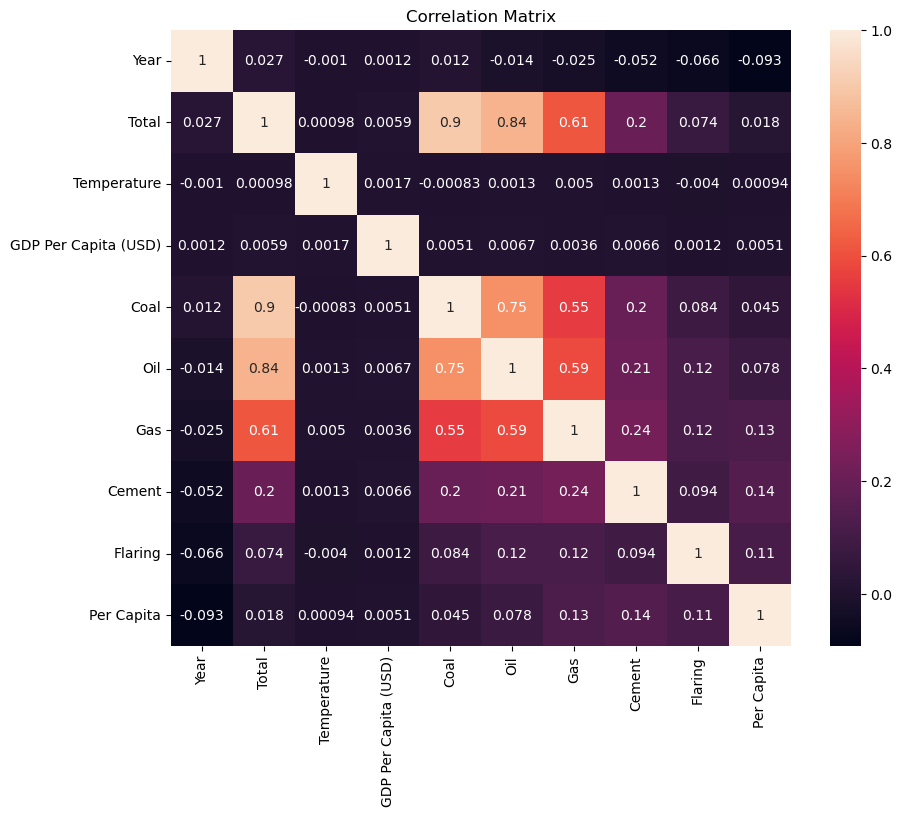

In [67]:
numeric_df = clean_df.select_dtypes(include=['float64','int64'])
matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

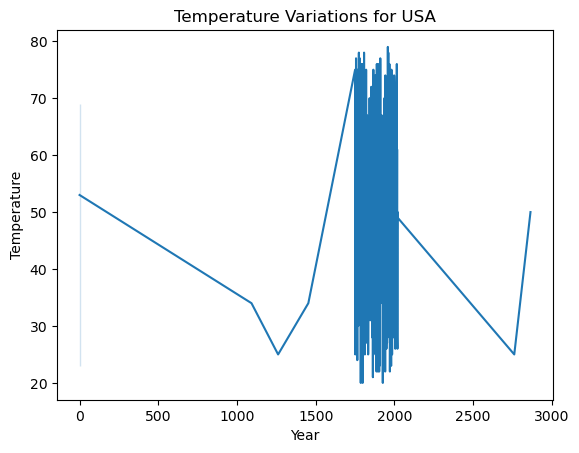

In [68]:
country='USA'
temp_to_year_df = clean_df[['Country','Year','Temperature']]
country_data = temp_to_year_df[temp_to_year_df['Country'] == country]
sns.lineplot(x='Year', y='Temperature', data=country_data)
plt.title(f"Temperature Variations for {country}")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

This particular analysis shows further gap in the data. There exists data pointing to future as well. We will delete all these entries and put it to clean_df

In [69]:
clean_df = clean_df.loc[clean_df['Year'] < 2024]

This operation should eliminate undesired future dates.

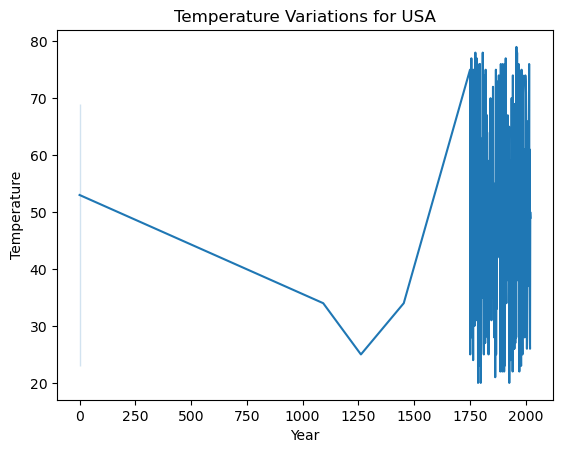

In [70]:
country='USA'
temp_to_year_df = clean_df[['Country','Year','Temperature']]
country_data = temp_to_year_df[temp_to_year_df['Country'] == country]
sns.lineplot(x='Year', y='Temperature', data=country_data)
plt.title(f"Temperature Variations for {country}")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

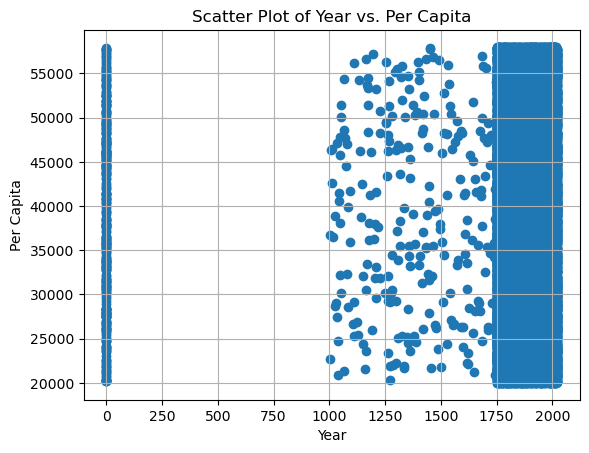

In [71]:
plt.scatter(clean_df['Year'], clean_df['GDP Per Capita (USD)'])
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Scatter Plot of Year vs. Per Capita')
plt.grid(True)
plt.show()

In [72]:
clean_df.loc[clean_df['Year'] == 0]

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
106,AFGHANISTAN,AFG,0.0,0.000000,48,51887,0.00000,0.000000,1398.0,0.000000,0.0,0.000000
480,ALBANIA,ALB,0.0,1.201465,30,35918,0.00000,0.000000,0.0,0.039977,0.0,0.750455
705,ALGERIA,DZA,0.0,0.000000,28,41983,0.00000,0.000000,0.0,0.000000,0.0,1444.000000
1013,ANDORRA,AND,0.0,0.000000,20,48225,0.00000,0.000000,0.0,0.000000,0.0,0.000000
1018,ANDORRA,AND,0.0,1399.000000,27,53381,0.00000,0.000000,0.0,0.000000,0.0,1634.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
61675,WALLIS AND FUTUNA ISLANDS,WLF,0.0,0.000000,29,37549,0.00000,1027.000000,0.0,0.000000,0.0,0.000000
61886,YEMEN,YEM,0.0,0.000000,71,55414,0.00000,0.000000,0.0,0.000000,0.0,0.000000
62138,ZAMBIA,ZMB,0.0,0.000000,46,45792,0.00000,0.000000,0.0,0.000000,0.0,0.000000
62447,ZIMBABWE,ZWE,0.0,0.000000,67,56334,1393.00000,0.000000,0.0,0.000000,0.0,0.000000


We can observe that GDP per capita is plotted for only year 0. This can be considered an outlier and since its an extreme one, it can influence the outcome of our operation further down the line. We will eliminate these records. 

In [73]:
clean_df = clean_df.loc[clean_df['Year'] != 0]


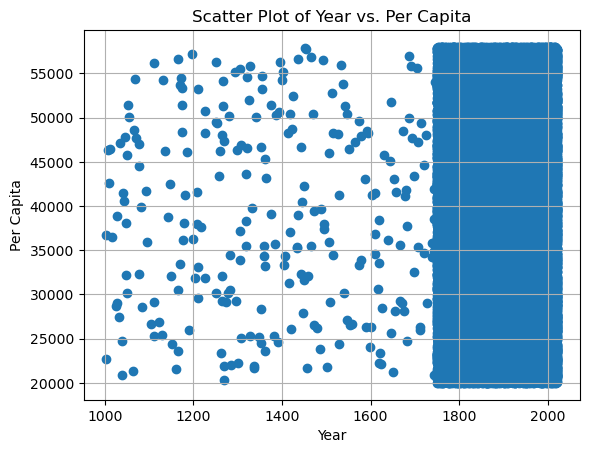

In [74]:
plt.scatter(clean_df['Year'], clean_df['GDP Per Capita (USD)'])
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Scatter Plot of Year vs. Per Capita')
plt.grid(True)
plt.show()

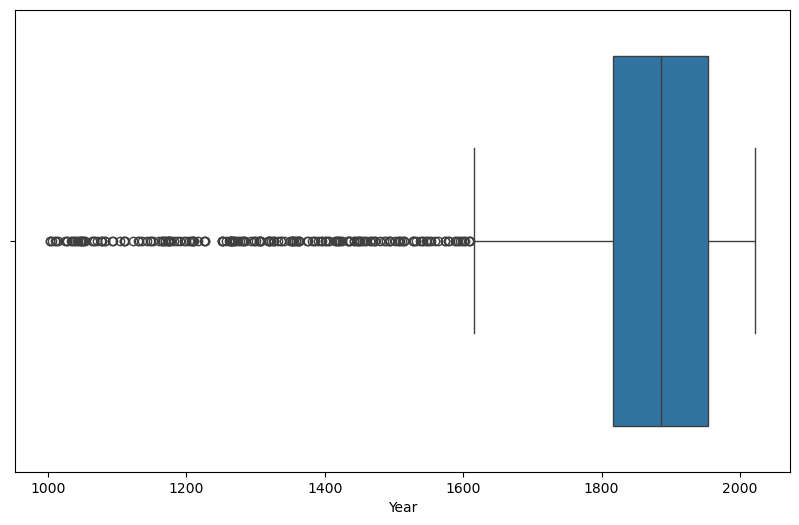

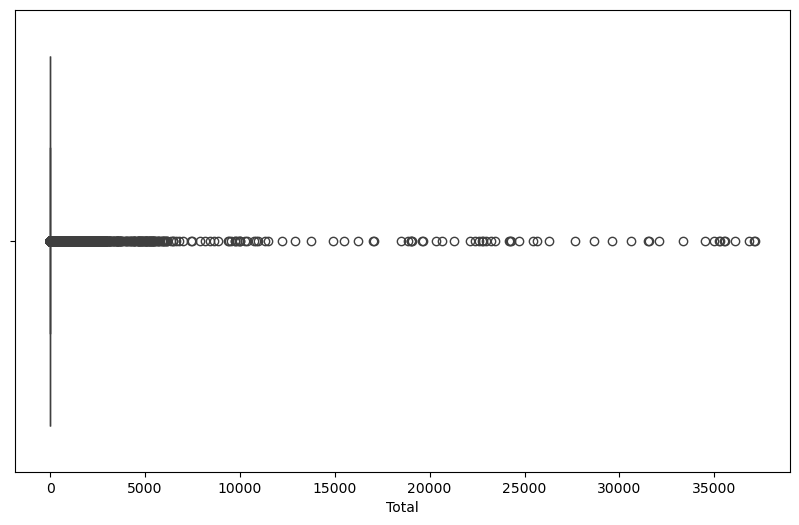

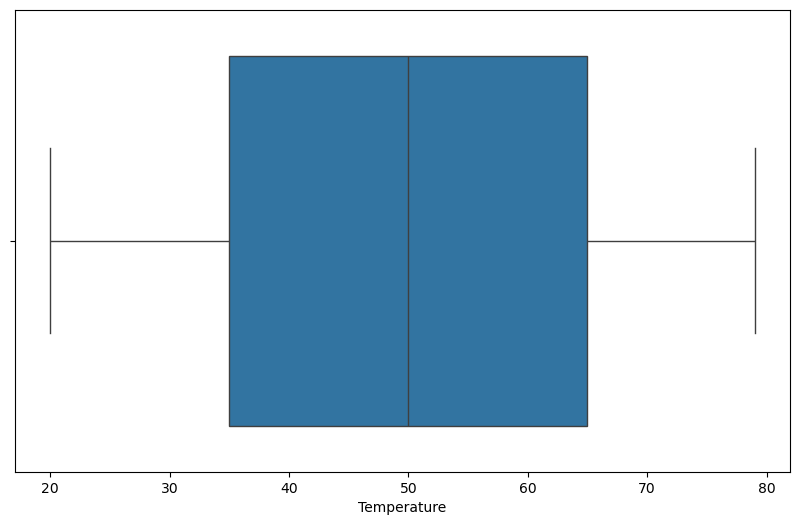

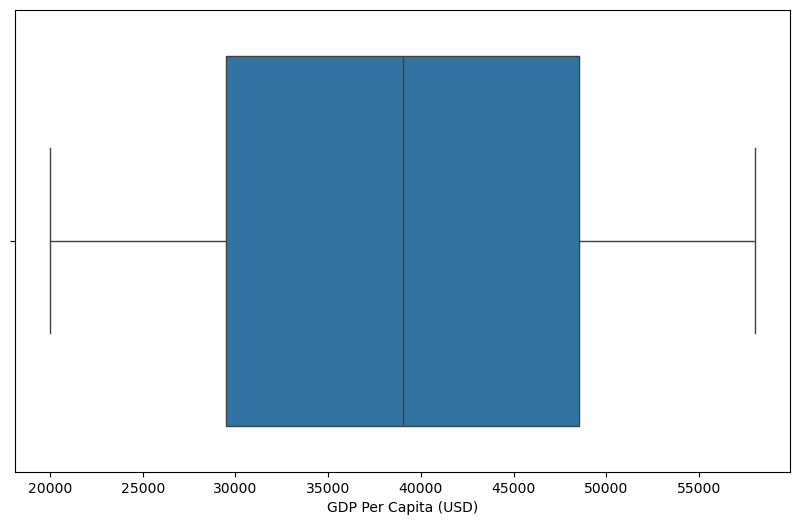

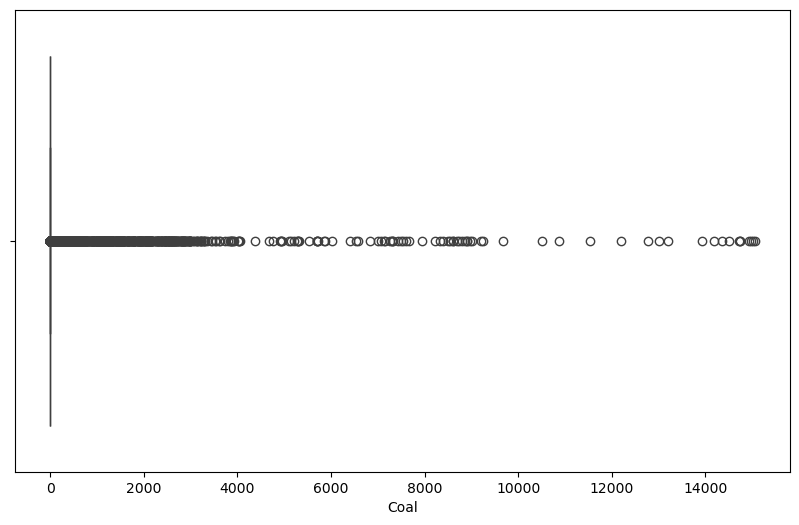

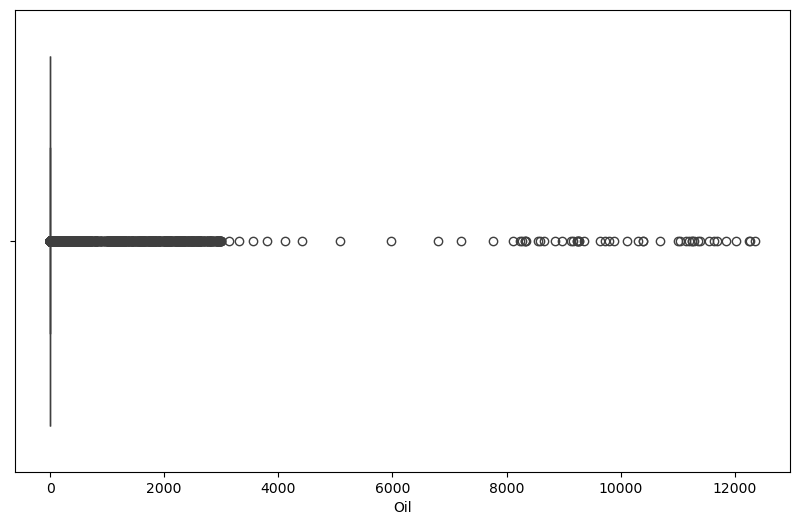

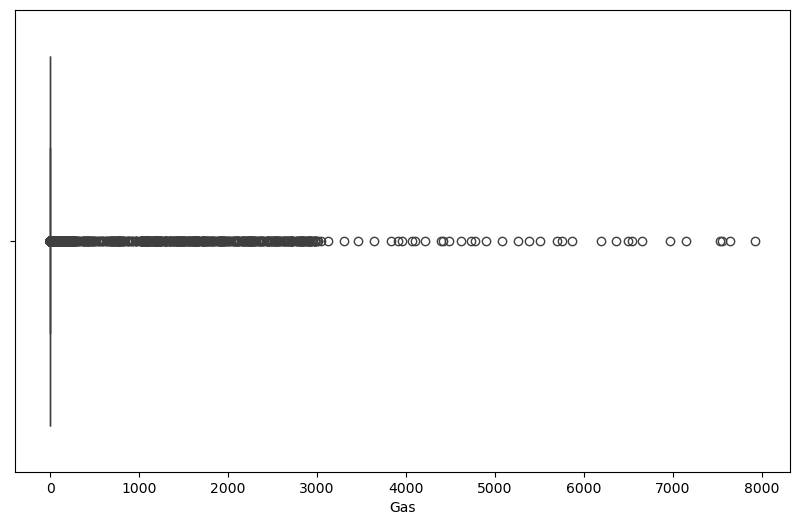

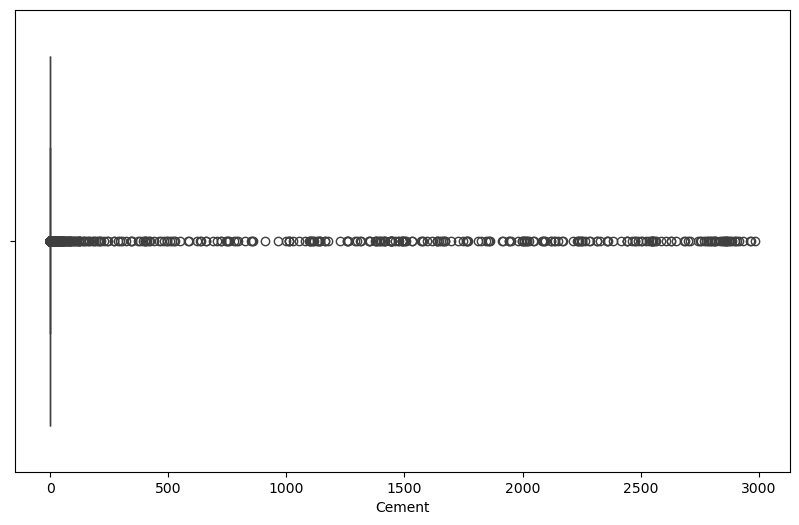

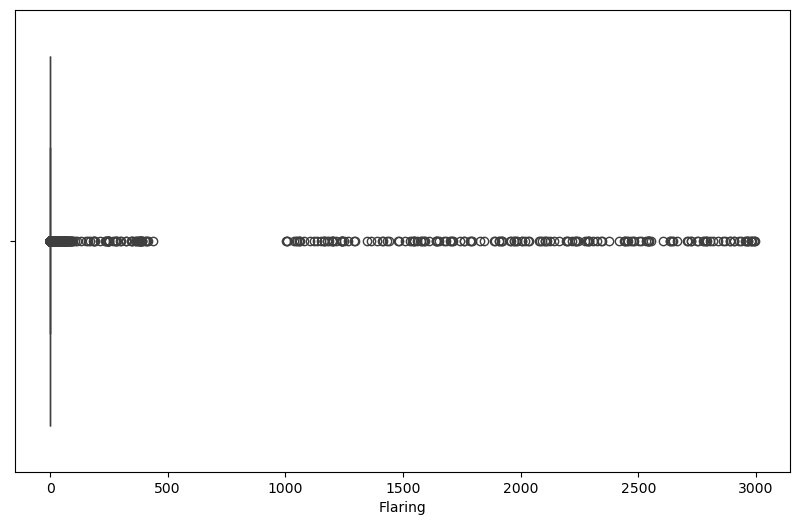

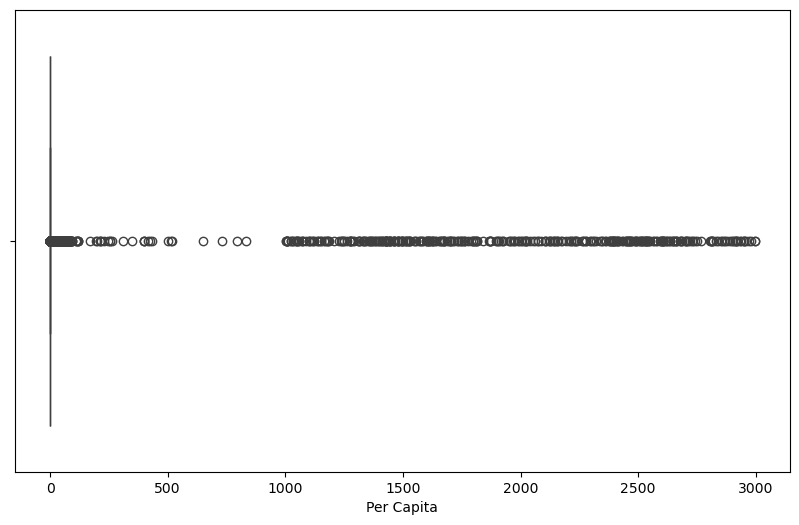

In [75]:
for c in clean_df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=clean_df[c])
    plt.show()

In [76]:
df_zscore = clean_df.copy()
for i in df.select_dtypes(include=['int64','float64']).columns:
  z_score_column = i + '_z-score'
  df_zscore[z_score_column] = (df[i] - df[i].mean()) / df[i].std()

In [77]:
df_zscore.head()


,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,...,Year_z-score,Total_z-score,Temperature_z-score,GDP Per Capita (USD)_z-score,Coal_z-score,Oil_z-score,Gas_z-score,Cement_z-score,Flaring_z-score,Per Capita_z-score
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.0,0.0,0.0,0.0,...,-1.127320,-0.08731,1.185639,1.496825,NaN,NaN,NaN,NaN,NaN,NaN
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.0,0.0,0.0,0.0,...,-1.119167,-0.08731,0.954320,0.553454,NaN,NaN,NaN,NaN,NaN,NaN
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.0,0.0,0.0,0.0,...,-1.111013,-0.08731,1.301299,-0.650131,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.0,0.0,0.0,0.0,...,-1.102860,-0.08731,-0.317938,-0.324407,NaN,NaN,NaN,NaN,NaN,NaN
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.0,0.0,0.0,0.0,...,-1.094707,-0.08731,-1.648026,-0.526584,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_zscore.shape

(57570, 22)

In [79]:
capture_outlier_column = []
for i in df_zscore.columns[df_zscore.columns.str.endswith('_z-score')]:
    outliers = df_zscore[df_zscore[i] > 3 ]
    print(f"Number of outliers in {i}: {len(outliers)}")
    if len(outliers) > 0:
        capture_outlier_column.append(i)

Number of outliers in Year_z-score: 0
Number of outliers in Total_z-score: 235
Number of outliers in Temperature_z-score: 0
Number of outliers in GDP Per Capita (USD)_z-score: 0
Number of outliers in Coal_z-score: 215
Number of outliers in Oil_z-score: 227
Number of outliers in Gas_z-score: 256
Number of outliers in Cement_z-score: 186
Number of outliers in Flaring_z-score: 167
Number of outliers in Per Capita_z-score: 246


In [80]:
capture_outlier_column

['Total_z-score',
 'Coal_z-score',
 'Oil_z-score',
 'Gas_z-score',
 'Cement_z-score',
 'Flaring_z-score',
 'Per Capita_z-score']

In [81]:
for i in capture_outlier_column:
    df_zscore = df_zscore.drop(df_zscore.loc[df_zscore[i] > 3].index)

In [82]:
df_zscore.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,...,Year_z-score,Total_z-score,Temperature_z-score,GDP Per Capita (USD)_z-score,Coal_z-score,Oil_z-score,Gas_z-score,Cement_z-score,Flaring_z-score,Per Capita_z-score
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.0,0.0,0.0,0.0,...,-1.127320,-0.08731,1.185639,1.496825,NaN,NaN,NaN,NaN,NaN,NaN
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.0,0.0,0.0,0.0,...,-1.119167,-0.08731,0.954320,0.553454,NaN,NaN,NaN,NaN,NaN,NaN
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.0,0.0,0.0,0.0,...,-1.111013,-0.08731,1.301299,-0.650131,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.0,0.0,0.0,0.0,...,-1.102860,-0.08731,-0.317938,-0.324407,NaN,NaN,NaN,NaN,NaN,NaN
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.0,0.0,0.0,0.0,...,-1.094707,-0.08731,-1.648026,-0.526584,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df_zscore = df_zscore.drop(columns=[col for col in df_zscore.columns if col.endswith('_z-score')])


In [84]:
df_zscore.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.0,0.0,0.0,0.0,0.0,0.0
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.0,0.0,0.0,0.0,0.0,0.0
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.0,0.0,0.0,0.0,0.0,0.0
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.0,0.0,0.0,0.0,0.0,0.0
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df_zscore.shape

(56547, 12)

### We can observe that the entries have changed and we have eliminated outliers which are more than 3 standard deviations away. New df row count = 56547 , previous count = 57570

In [86]:
clean_df = df_zscore.copy()

In [87]:
sublist = ['Coal','Oil','Gas','Cement','Flaring']

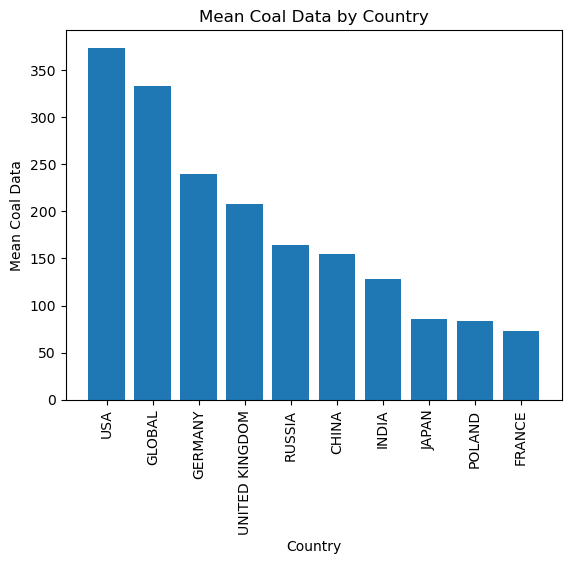

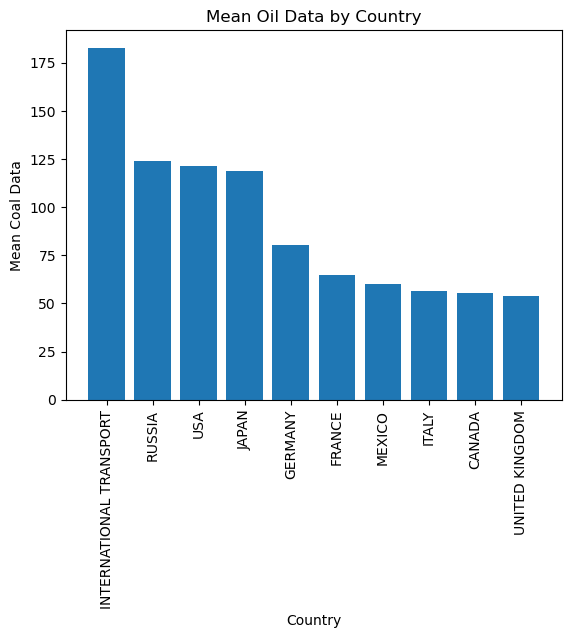

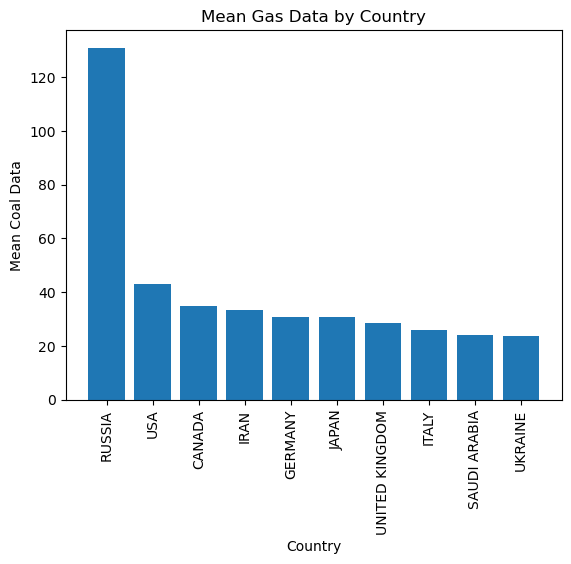

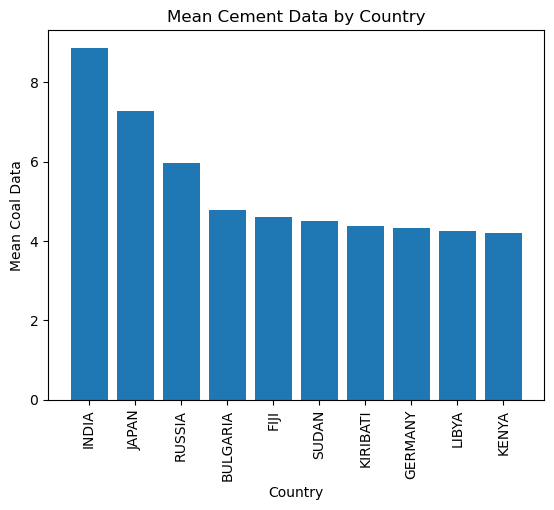

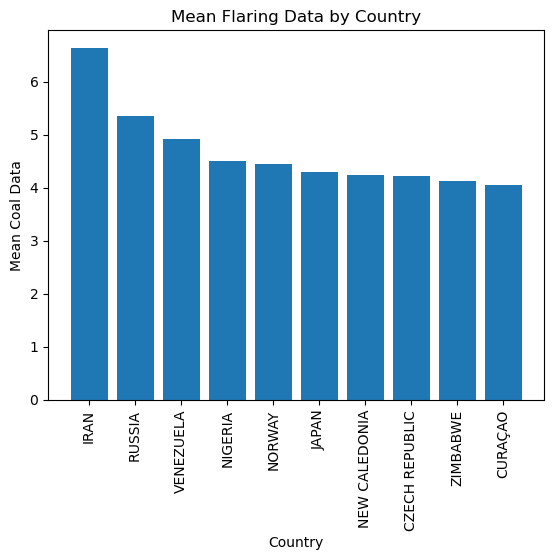

In [88]:
for col in sublist:
    mean_coal_data = clean_df.groupby('Country')[col].mean()
    top10Largest = mean_coal_data.nlargest(10)
    plt.bar(top10Largest.index, top10Largest.values)
    plt.xlabel('Country')
    plt.ylabel('Mean Coal Data')
    plt.title(f'Mean {col} Data by Country')
    plt.xticks(rotation=90)
    plt.show()  

In [89]:
df_encoded = pd.get_dummies(clean_df, columns=['Country', 'ISO'])

In [90]:
df_encoded.head()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita,...,ISO_VNM,ISO_VUT,ISO_WLD,ISO_WLF,ISO_WSM,ISO_XIT,ISO_YEM,ISO_ZAF,ISO_ZMB,ISO_ZWE
0,1750.0,0.0,70,55455,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1751.0,0.0,66,45101,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1752.0,0.0,72,31891,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1753.0,0.0,44,35466,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1754.0,0.0,21,33247,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [91]:
clean_df.columns[5:]

Index(['GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Per Capita'],
      dtype='object')

In [92]:
non_categorical_cols = clean_df.columns[5:]

In [93]:
min_values = df_encoded[non_categorical_cols].min()
max_values = df_encoded[non_categorical_cols].max()

In [94]:
normalized_df = (df_encoded[non_categorical_cols] - min_values) / (max_values - min_values)


In [95]:
normalized_df.head()

,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,0.933051,0.0,0.0,0.0,0.0,0.0,0.0
1,0.660570,0.0,0.0,0.0,0.0,0.0,0.0
2,0.312929,0.0,0.0,0.0,0.0,0.0,0.0
3,0.407011,0.0,0.0,0.0,0.0,0.0,0.0
4,0.348614,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
pre_processed_df = pd.concat([normalized_df,df_encoded.iloc[:,5:]], axis=1)

In [97]:
pre_processed_df.head()

,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita,Oil,Gas,Cement,...,ISO_VNM,ISO_VUT,ISO_WLD,ISO_WLF,ISO_WSM,ISO_XIT,ISO_YEM,ISO_ZAF,ISO_ZMB,ISO_ZWE
0,0.933051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.660570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.312929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.407011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.348614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [98]:
pre_processed_df.to_csv('emissions_by_country_preprocessed.csv', index=False)

### Dataset - Breeding Birds Atlas

In [426]:
df = pd.read_csv('breeding_bird_atlas.csv')

In [427]:
print("Dataset shape",df.shape)

Dataset shape (361582, 16)


In [428]:
df.head(10)

,Fed. Region,Block ID,Map Link,County,Common Name,Scientific Name,NYS Protection Status,Family Name,Family Description,Breeding Behavior,Month,Day,Year,Temperature,Average UB Student GPA,Breeding Status
0,NaN,5773C,50,NaN,NaN,12,10,71,TYRANT FLYCATCHERS,singing male present on more than one date in ...,NaN,NaN,1985.0,59,2.26,Probable
1,8.0,5569B,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5569b...,ALBANY,Alder Flycatcher,Empidonax alnorum,Protected,TYRANNIDAE,TYRANT FLYCATCHERS,"Nest and eggs, bird on nest or egg, or eggshel...",NaN,NaN,1985.0,78,2.77,Confirmed
2,8.0,5773C,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5773c...,ALBANY,American Black Duck,Anas rubripes,Game Species,ANATIDAE,"SWANS, GEESE & DUCKS",Pair observed in suitable habitat in breeding ...,NaN,NaN,1985.0,72,3.08,Probable
3,8.0,5872A,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5872a...,ALBANY,American Black Duck,Anas rubripes,Game Species,ANATIDAE,"SWANS, GEESE & DUCKS",Species seen in possible nesting habitat or si...,NaN,NaN,1985.0,52,2.09,Possible
4,8.0,5570D,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5570d...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Singing male present on more than one date in ...,NaN,NaN,1985.0,28,2.28,Probable
5,8.0,5671D,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5671d...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Species seen in possible nesting habitat or si...,NaN,NaN,1985.0,41,2.86,Possible
6,8.0,5669A,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5669a...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Species seen in possible nesting habitat or si...,NaN,NaN,1985.0,40,3.62,Possible
7,8.0,5872C,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5872c...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Adult(s) with food for young or feeding young.,NaN,NaN,1985.0,35,3.06,Confirmed
8,8.0,5870D,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5870d...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Nest with young.,NaN,NaN,1985.0,55,3.11,Confirmed
9,8.0,5871B,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5871b...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Adult(s) with food for young or feeding young.,NaN,NaN,1985.0,74,3.15,Confirmed


In [429]:
df.describe()

,Fed. Region,Month,Day,Year,Temperature,Average UB Student GPA
count,355787.000000,3426.000000,9338.000000,351102.000000,361582.000000,361582.000000
mean,5.855652,49.772329,49.511994,1964.180056,49.467487,2.850668
std,5.836586,28.659289,28.794700,190.069866,17.322758,0.490552
min,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000
25%,3.000000,26.000000,25.000000,1982.000000,34.000000,2.430000
50%,6.000000,50.000000,49.000000,1983.000000,49.000000,2.850000
75%,8.000000,74.000000,75.000000,1984.000000,64.000000,3.280000
max,99.000000,99.000000,99.000000,1985.000000,79.000000,3.700000


In [430]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361582 entries, 0 to 361581
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Fed. Region             355787 non-null  float64
 1   Block ID                358864 non-null  object 
 2   Map Link                356865 non-null  object 
 3   County                  350980 non-null  object 
 4   Common Name             351052 non-null  object 
 5   Scientific Name         354097 non-null  object 
 6   NYS Protection Status   353112 non-null  object 
 7   Family Name             359126 non-null  object 
 8   Family Description      356849 non-null  object 
 9   Breeding Behavior       356399 non-null  object 
 10  Month                   3426 non-null    float64
 11  Day                     9338 non-null    float64
 12  Year                    351102 non-null  float64
 13  Temperature             361582 non-null  int64  
 14  Average UB Student G

In [431]:
print("Categorical Columns - ",df.select_dtypes(include=['object']).columns)

Categorical Columns -  Index(['Block ID', 'Map Link', 'County', 'Common Name', 'Scientific Name',
       'NYS Protection Status', 'Family Name', 'Family Description',
       'Breeding Behavior', 'Breeding Status'],
      dtype='object')


In [432]:
print("Numerical Columns-",df.select_dtypes(include=['int64','float64']).columns)

Numerical Columns- Index(['Fed. Region', 'Month', 'Day', 'Year', 'Temperature',
       'Average UB Student GPA'],
      dtype='object')


In [433]:
cat = len(df.select_dtypes(include=['object']).columns)
num = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features:', cat+num," = ",cat, 'categorical', '+',
      num, 'numerical')

Total Features: 16  =  10 categorical + 6 numerical


In [434]:
print("Null Values in each column")
print(df.isnull().sum())  
# since month and day are nearly empty , we can drop those columns
df = df.drop(columns=['Month','Day'],axis=1)

# dropping column - Map Link , Average UB Student GPA as it does not impute any relation to prediction
df = df.drop(columns=['Map Link','Average UB Student GPA'],axis = 1)


Null Values in each column
Fed. Region                 5795
Block ID                    2718
Map Link                    4717
County                     10602
Common Name                10530
Scientific Name             7485
NYS Protection Status       8470
Family Name                 2456
Family Description          4733
Breeding Behavior           5183
Month                     358156
Day                       352244
Year                       10480
Temperature                    0
Average UB Student GPA         0
Breeding Status                0
dtype: int64


In [435]:
# finding distinct data and correcting mismatched data
print("Unique values in each column- \n",df.nunique())

Unique values in each column- 
 Fed. Region               100
Block ID                 8365
County                    224
Common Name               727
Scientific Name           713
NYS Protection Status     118
Family Name               189
Family Description        193
Breeding Behavior         146
Year                      106
Temperature                60
Breeding Status             3
dtype: int64


In [436]:
print("Unique Values and their count\n")
for c in df.columns:
    print(df[c].value_counts(),end="\n")
    

Unique Values and their count

Fed. Region
8.0     48078
7.0     41295
4.0     40067
1.0     38963
5.0     38658
        ...  
92.0       24
67.0       24
91.0       24
46.0       22
47.0       21
Name: count, Length: 100, dtype: int64
Block ID
3768A    137
4372C    120
2972A    119
3275C    117
2472D    115
        ... 
2469b      1
2271d      1
2266b      1
2469a      1
3071a      1
Name: count, Length: 8365, dtype: int64
County
ST LAWRENCE    18242
ESSEX          11450
FRANKLIN       11079
HAMILTON       10820
DELAWARE       10482
               ...  
queens            14
richmond          11
bronx              6
new york           1
kings              1
Name: count, Length: 224, dtype: int64
Common Name
Song Sparrow              4847
American Robin            4824
Black-capped Chickadee    4811
Common Yellowthroat       4802
Blue Jay                  4778
                          ... 
LAUGHING GULL                1
american oystercatcher       1
clapper rail                 1
mute

#### Replacing Nan with Mean and Mode

In [437]:
# we replace missing values with mean - where data type is numerical and mode - where data type is categorical
for i in df.select_dtypes(include=['object']).columns:
        mode_value = df[i].mode()[0]
        df[i].fillna(mode_value,inplace=True)

for i in df.select_dtypes(include=['int64','float64']).columns:
        mean_value = df[i].mean()
        df[i].fillna(math.ceil(mean_value),inplace=True)

print(df.isnull().sum())  

Fed. Region              0
Block ID                 0
County                   0
Common Name              0
Scientific Name          0
NYS Protection Status    0
Family Name              0
Family Description       0
Breeding Behavior        0
Year                     0
Temperature              0
Breeding Status          0
dtype: int64


#### Check for outliers

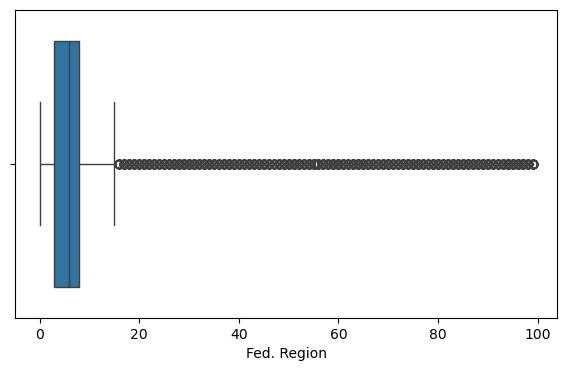

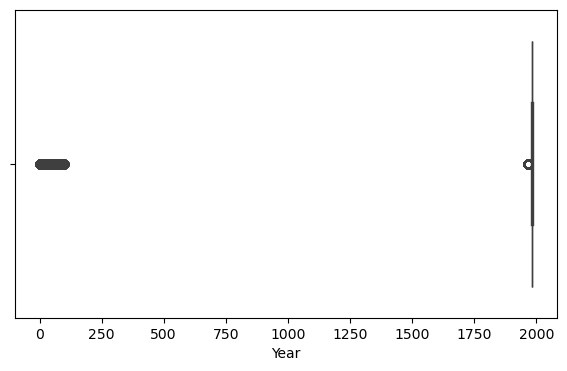

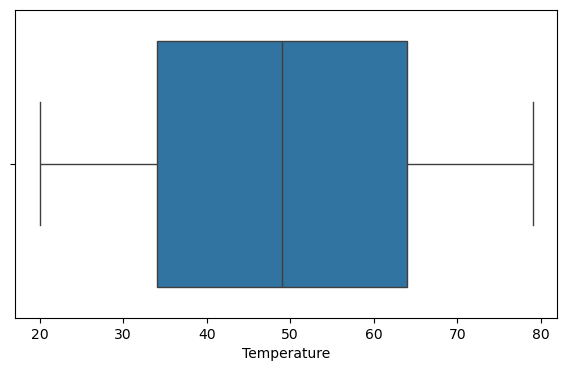

In [438]:
# plotting graph to understand the data and check for outliers
for c in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[c])  
    plt.show()

In [439]:
# we see lot of outliers in Fed. Region and year , lets remove them 

print("Count where years < 1700: ",df[df['Year']<1700]['Year'].count())
print("Count where Fed. Region > 20: ",df[df['Fed. Region']>20]['Fed. Region'].count())

Count where years < 1700:  3423
Count where Fed. Region > 20:  2726


In [440]:
# since number of rows are greater we replace them with mean

yearMean = df[df['Year']>=1700]['Year'].mean()
df.loc[df['Year']<1700,'Year'] = math.ceil(yearMean)

regionMean = df[df['Fed. Region']<=20]['Fed. Region'].mean()
df.loc[df['Fed. Region']>20,'Fed. Region'] = math.ceil(regionMean)

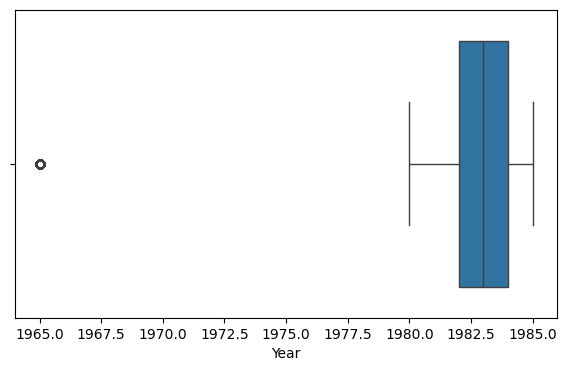

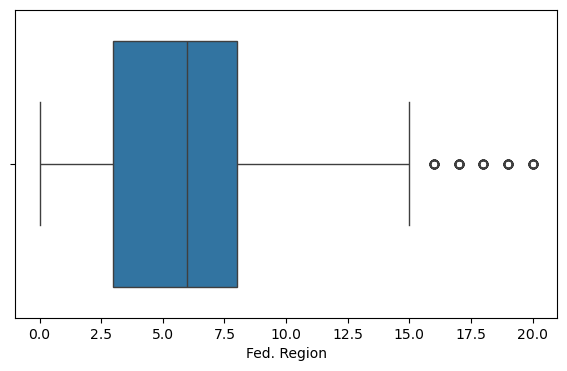

In [441]:
for c in ['Year','Fed. Region']:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[c])  
    plt.show()

In [442]:
# since there are some more outliers , lets increase the cut-off for outliers again in Years and Fed. Region

print("Count where years < 1900: ",df[df['Year']<1900]['Year'].count())
print("Count where Fed. Region > 15: ",df[df['Fed. Region']>15]['Fed. Region'].count())

Count where years < 1900:  0
Count where Fed. Region > 15:  164


In [443]:
# since there are few outliers in Fed. Region we replace them with mean

regionMean = df[df['Fed. Region']<=15]['Fed. Region'].mean()
df.loc[df['Fed. Region']>15,'Fed. Region'] = math.ceil(regionMean)

#### Handling mismatched string formats

In [444]:
# checking for numeric values in string values 

print("Numeric values in String data type:")
for c in df.select_dtypes(include=['object']):
    numericValues = df[c].str.isnumeric()
    print(c,"-",numericValues.sum())

#  since the data count is high , we are replacing it with mode
for c in df.select_dtypes(include=['object']):
    numericValues = df[c].str.isnumeric()
    modeValue = df[c].mode()[0] #getting first index
    df.loc[numericValues,c]=modeValue

# setting row values to lowercase to make all string unique
for c in df.select_dtypes(include=['object']):    
    df[c]=df[c].str.lower()

Numeric values in String data type:
Block ID - 6502
County - 3452
Common Name - 3454
Scientific Name - 6539
NYS Protection Status - 9259
Family Name - 9183
Family Description - 9205
Breeding Behavior - 6526
Breeding Status - 0


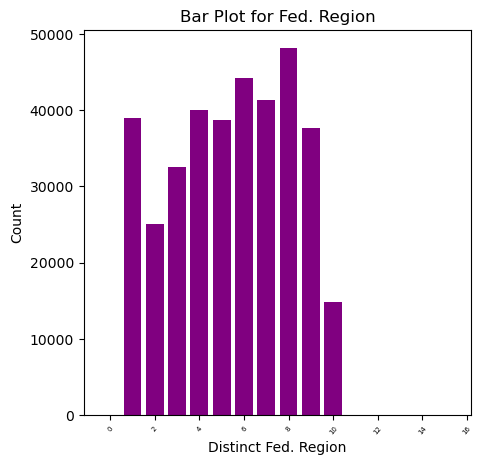

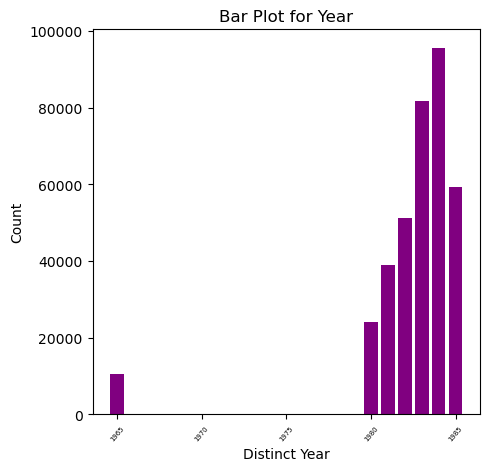

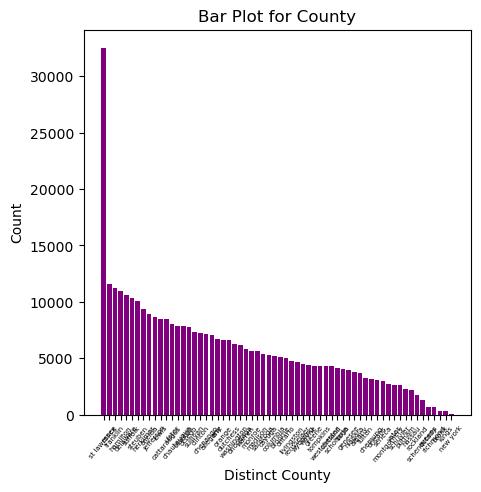

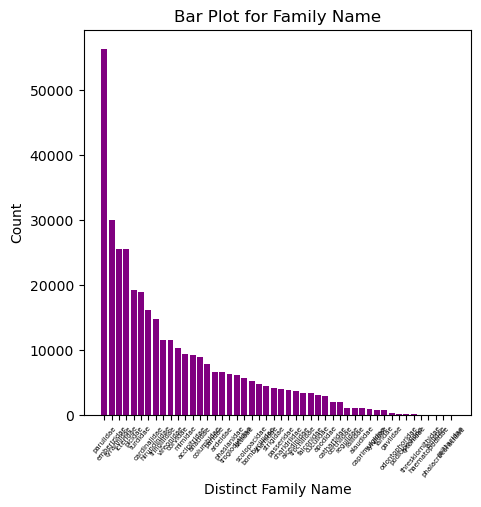

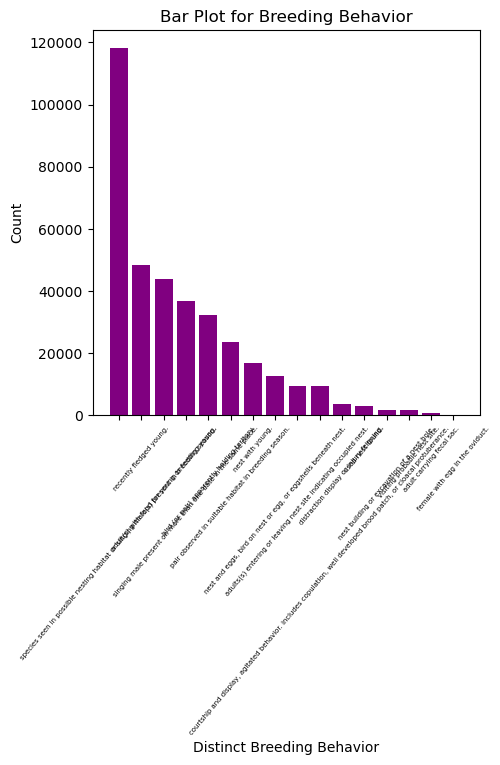

In [445]:
columns = ['Fed. Region','Year','County','Family Name','Breeding Behavior']
for c in columns:
    ct_count = df[c].value_counts()
    plt.figure(figsize=(5,5))
    plt.bar(ct_count.index,ct_count.values , color = 'purple')
    plt.title(f"Bar Plot for {c}")
    plt.xlabel(f"Distinct {c}")
    plt.ylabel("Count")
    plt.xticks(rotation = 50, fontsize=5)
    plt.show()


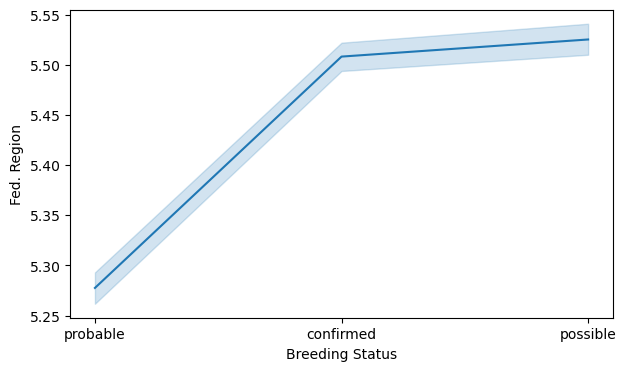

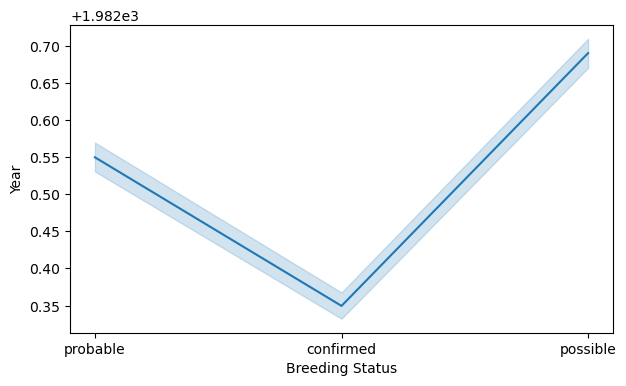

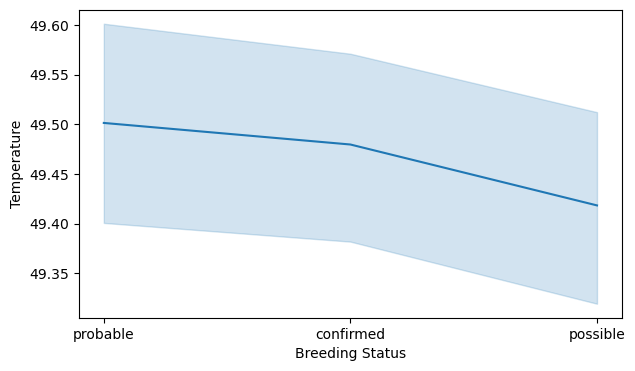

In [446]:
# check for skewness
for c in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(7, 4))
    sns.lineplot(y=df[c],x=df["Breeding Status"])  
    plt.show()

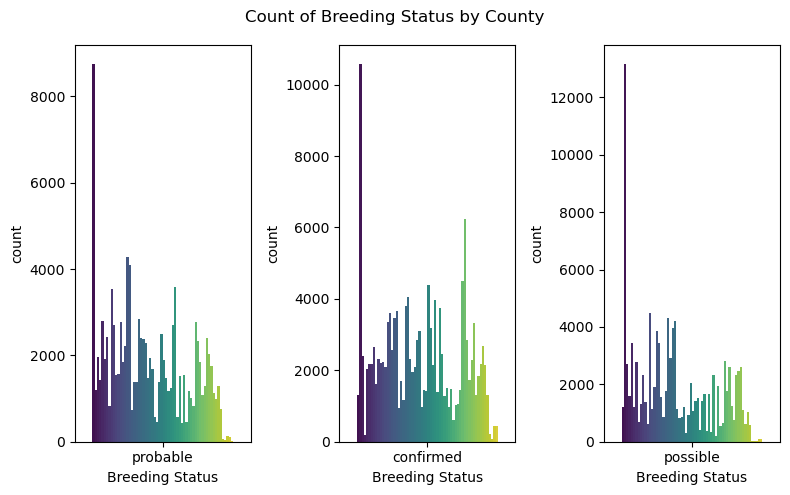

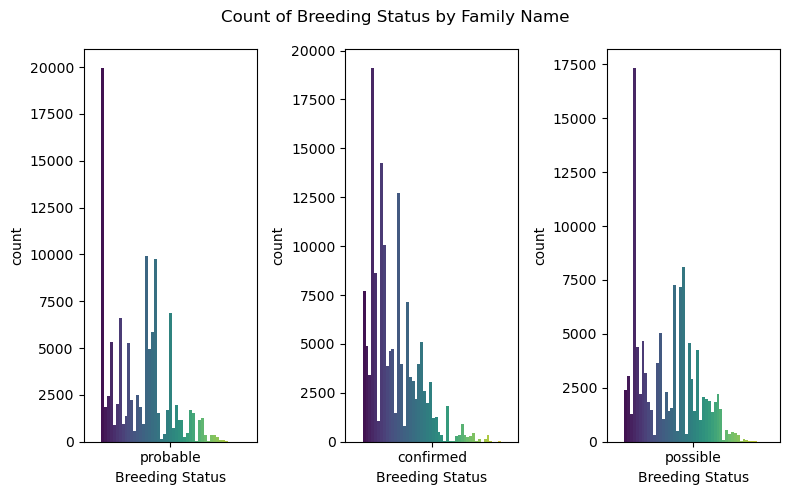

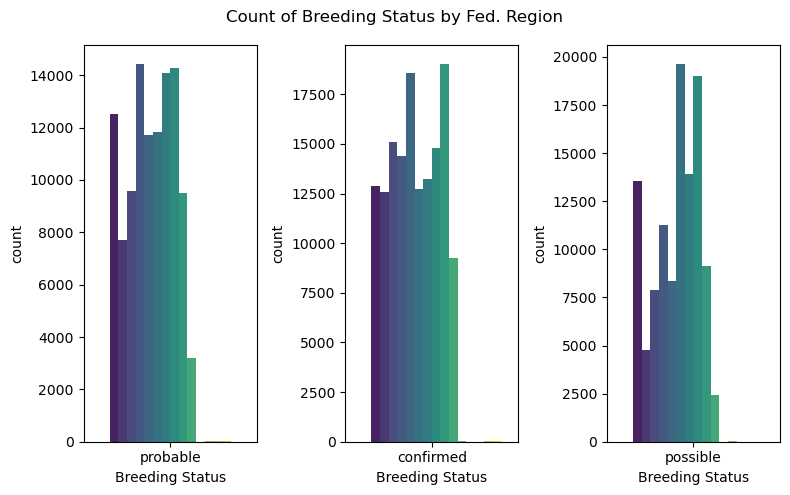

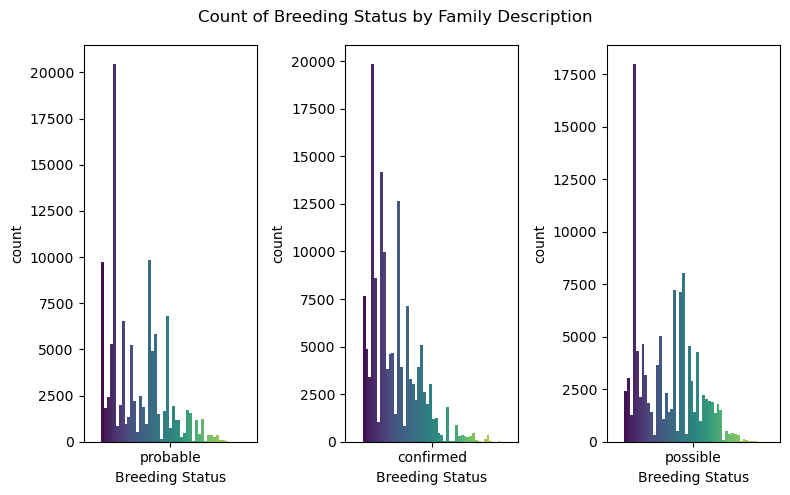

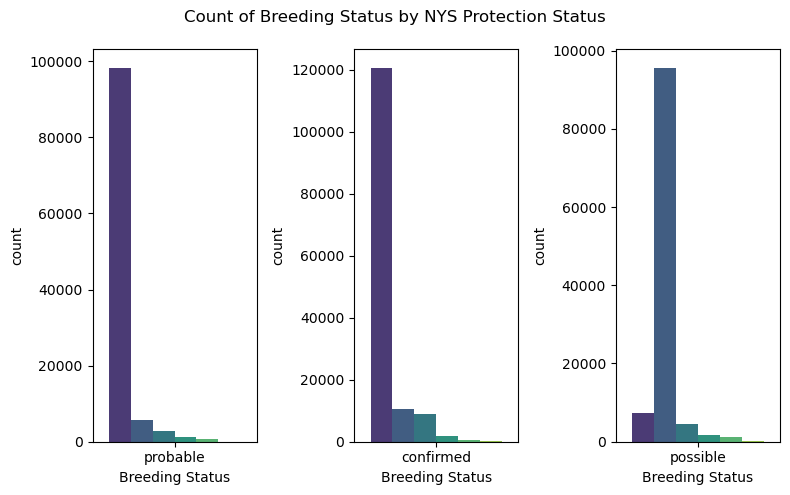

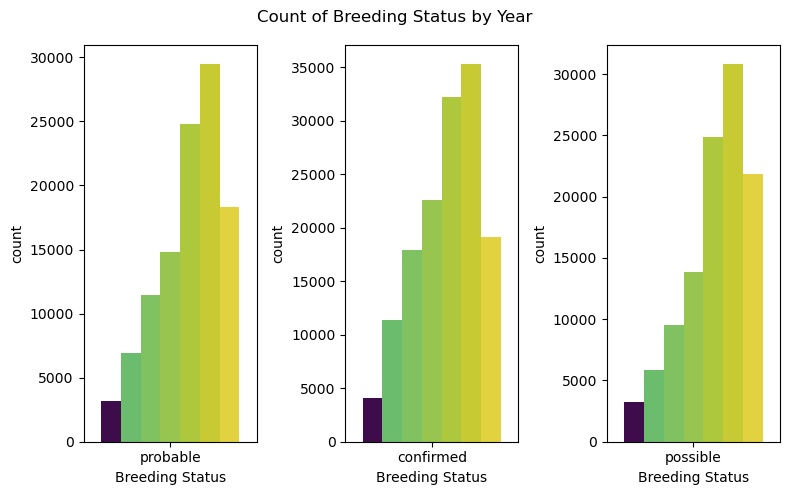

In [447]:
for col in list(set(df.columns) - set(['Breeding Status','Block ID','Common Name','Scientific Name','Temperature','Breeding Behavior'])):

    unique_values = df['Breeding Status'].unique()

    fig,axs=plt.subplots(1,len(unique_values),figsize=(8,5))
    for i, value in enumerate(unique_values):
        sub = df[df['Breeding Status']==value]
        sns.countplot(data=sub, x='Breeding Status', hue=col, palette='viridis',ax=axs[i])
        axs[i].legend_.remove()
    fig.suptitle(f'Count of {"Breeding Status"} by {col}')
    plt.tight_layout()
    plt.show()




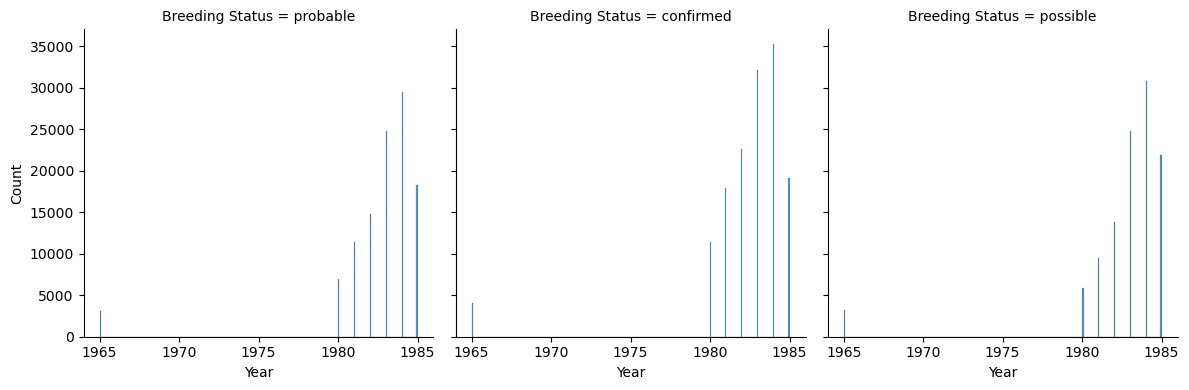

In [448]:
g = sns.FacetGrid(df, col="Breeding Status", col_wrap=3, height=4)
g.map(sns.histplot, 'Year') 
plt.show()


#### Encoding features to Categorical values

In [449]:
print("Unique values in each column after resolving mismatched data\n",df.nunique())

Unique values in each column after resolving mismatched data
 Fed. Region                16
Block ID                 5323
County                     62
Common Name               245
Scientific Name           245
NYS Protection Status       6
Family Name                48
Family Description         48
Breeding Behavior          16
Year                        7
Temperature                60
Breeding Status             3
dtype: int64


In [450]:
# since certains columns have lot of distinct values , it is not ideal to use one-hot encoding as it would make the model complex with lot of columns and create a over-fitted model
# hence we use frequency-encdoing
for col in ["Block ID","Common Name","Family Description","Scientific Name","County","Family Name"]:
    frequency = df[col].value_counts()
    df[col] = df[col].map(frequency)

# for others we can use one-hot encoding
for col in ["Breeding Behavior"]:
    df = pd.get_dummies(df, columns=[col],drop_first=True) 

# label-encoding
df['Breeding Status'] = df['Breeding Status'].apply(lambda x: 1 if x == 'confirmed' else 0)

# for NYS Protection Status we can do label encoding
uniqueCategory = df['NYS Protection Status'].unique()
categoryIndex = {category:id for id ,category in enumerate(uniqueCategory)}
df['NYS Protection Status Encoded'] = df['NYS Protection Status'].map(categoryIndex)
df = df.drop("NYS Protection Status",axis = 1)


# normalizing the data 
for col in ["Block ID","Common Name","Family Description","Scientific Name","County","Year","Temperature","Fed. Region","Family Name"]:
    xMax = df[col].max(axis=0)
    xMin = df[col].min(axis=0)
    df[col]=df[col].apply(lambda x: (x-xMin)/(xMax-xMin))
    


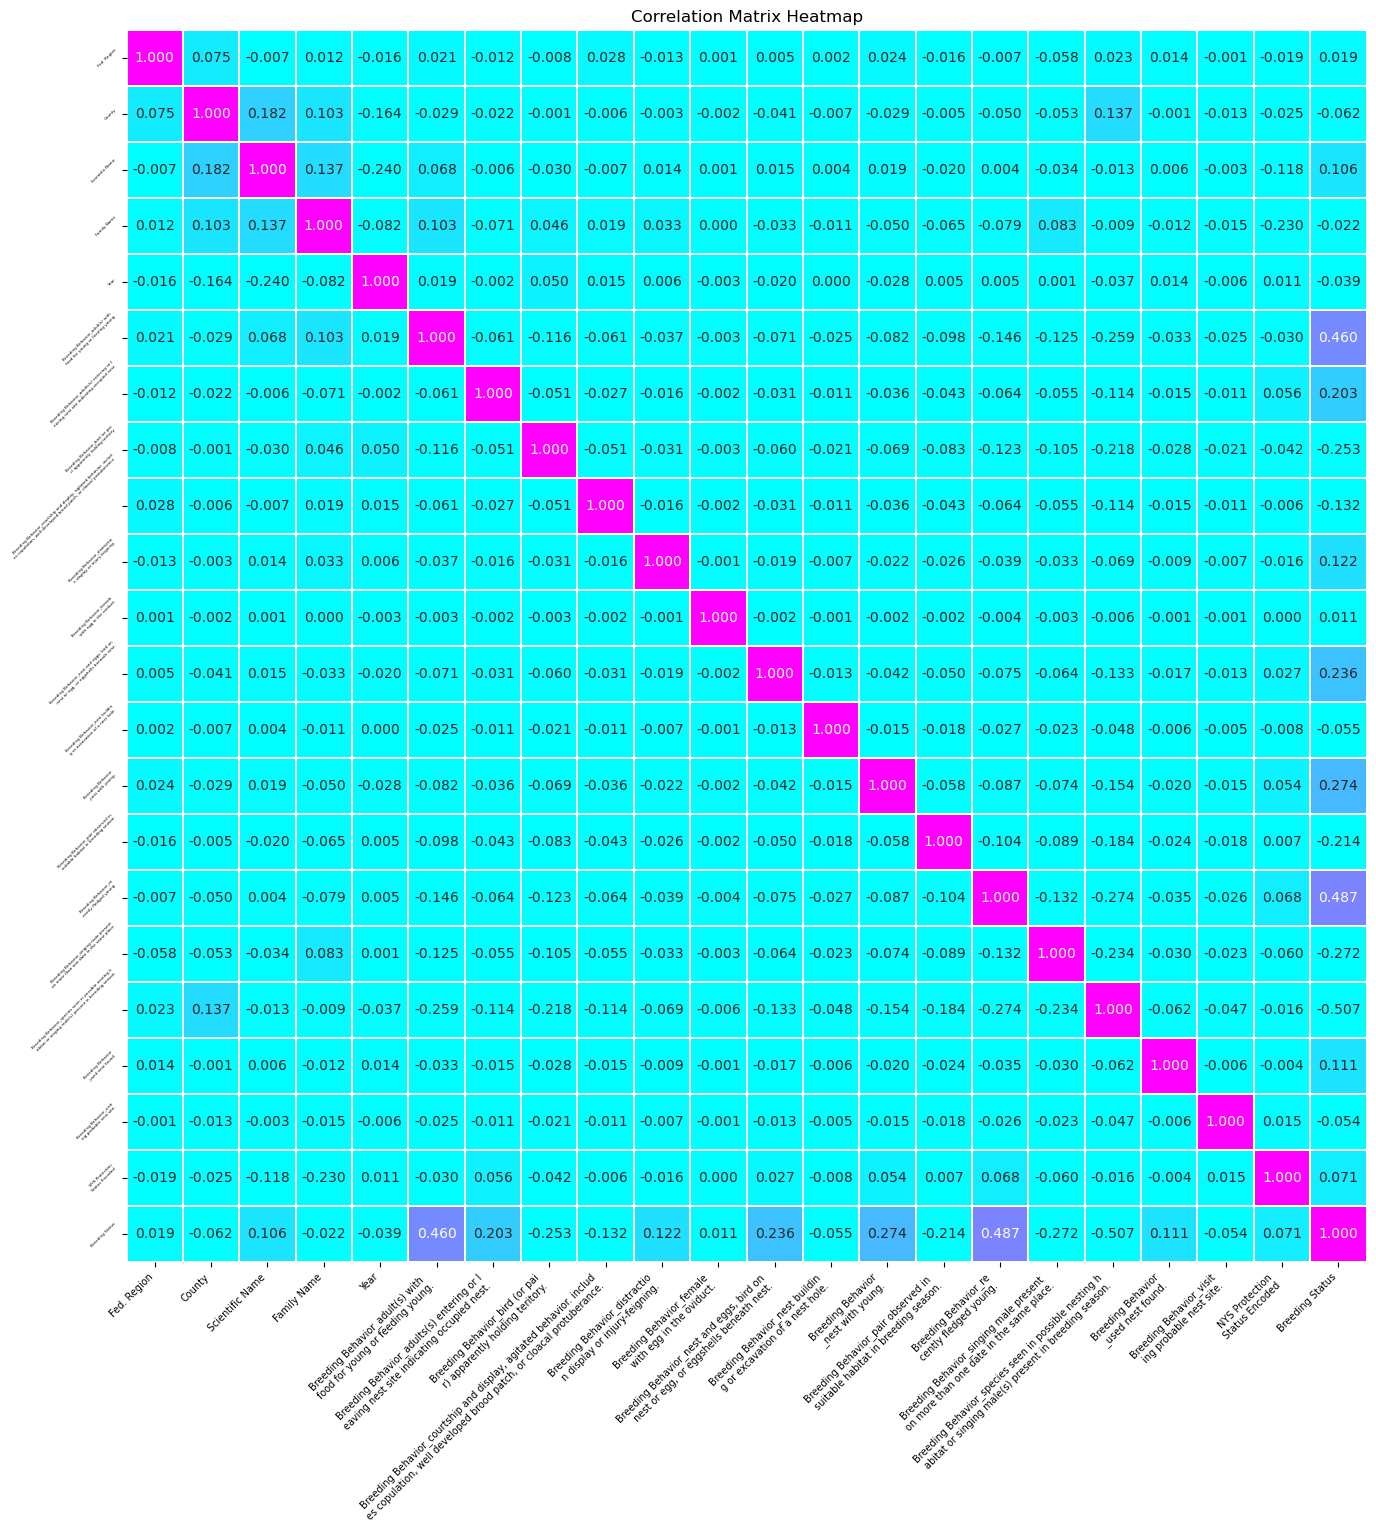

In [464]:
# re-arranging columns
columnOrder = [x for x in df.columns if x != "Breeding Status"] + ["Breeding Status"]
df = df[columnOrder]

temp_columns = []
for i in range(len(df.columns)):
    if len(df.columns[i])>15:
        temp_columns.append(df.columns[i][:int(len(df.columns[i])/2)]+"\n"+df.columns[i][int(len(df.columns[i])/2):])
    else:
        temp_columns.append(df.columns[i])

df.columns = temp_columns



correlation_matrix = df.corr()


plt.figure(figsize=(16, 16))

sns.heatmap(correlation_matrix, annot=True, cmap='cool', vmin=0, vmax=1, linewidths=0.1, fmt='.3f' , cbar=False)    
plt.xticks(rotation=45, ha='right',fontsize=7) 
plt.yticks(rotation=45, ha='right',fontsize=3)
plt.title('Correlation Matrix Heatmap')
plt.show()

df.columns = columnOrder


#### Dropping Columns with low Correlation

In [452]:
# dropping columns - Block ID , Temperature as it has very low relation with Breeding Status
df = df.drop(columns=['Block ID','Temperature'],axis=1)

In [453]:
# family name and family description have same correlation , hence removing redundant column
df = df.drop(columns=['Family Description'],axis=1)

In [454]:
# same goes for scientific name and common name 
df = df.drop(columns=['Common Name'],axis=1)

In [455]:
df.to_csv('breeding_bird_atlas_preprocessed.csv', index=False)